In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, StratifiedKFold


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/PCD1/assets/data/bases_modificadas/State_of_Data_dados_tratados.csv")

#Definição do Atributo alvo

In [ ]:
y = df['progressao_prejudicada']
X = df.drop('progressao_prejudicada', axis=1)

# Separação em treino e teste

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42, stratify=y
)

In [ ]:
X_train.shape

(753, 14)

In [ ]:
X_test.shape

(134, 14)

In [ ]:
y_train.shape

(753,)

In [ ]:
y_test.shape

(134,)

In [ ]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42,
)

rf_model.fit(X_train, y_train)


grid_search = GridSearchCV(
    estimator= rf_model,
    cv=5,  # 5 folds para validação cruzada
    scoring='f1_macro'  # Métrica de avaliação
)

print(cross_val_score(rf_model, X, y, cv=5))


[0.48314607 0.53932584 0.46892655 0.55932203 0.49152542]


Acurácia teste: 1.0

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       381
           1       1.00      1.00      1.00       372

    accuracy                           1.00       753
   macro avg       1.00      1.00      1.00       753
weighted avg       1.00      1.00      1.00       753



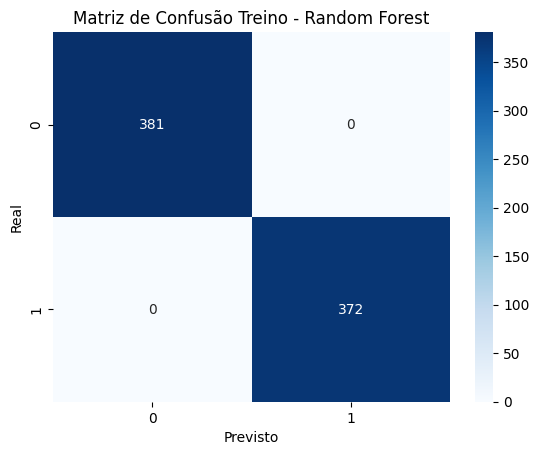

Acurácia teste: 0.4626865671641791

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.47      0.49      0.48        68
           1       0.45      0.44      0.45        66

    accuracy                           0.46       134
   macro avg       0.46      0.46      0.46       134
weighted avg       0.46      0.46      0.46       134



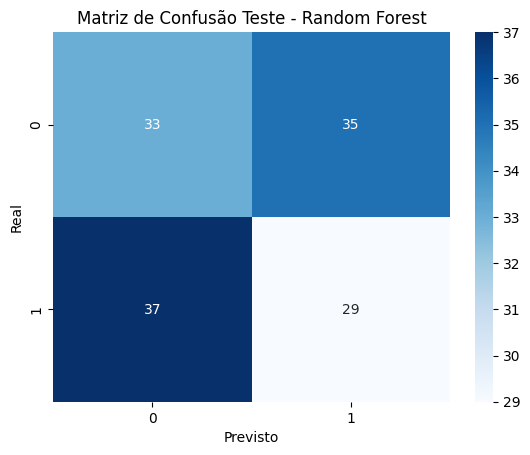

In [ ]:
y_pred_tr = rf_model.predict(X_train)

print("Acurácia teste:", accuracy_score(y_train, y_pred_tr))
print("\nRelatório de Classificação:\n", classification_report(y_train, y_pred_tr))

# Matriz de Confusão de treino
cm = confusion_matrix(y_train, y_pred_tr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão Treino - Random Forest")
plt.show()



y_pred_te = rf_model.predict(X_test)

print("Acurácia teste:", accuracy_score(y_test, y_pred_te))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred_te))

# Matriz de Confusão de treino
cm = confusion_matrix(y_test, y_pred_te)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão Teste - Random Forest")
plt.show()











